# Algoritmos de ordenamiento

## Algoritmo Bubble Sort (Burbuja)

## Idea general

Comparamos pares adyacentes y, si estan en el orden incorrecto, los intercambiamos. 
Despues de cada pasada completa, el elemento mas grande "burbujea" hacia el final del arreglo.

In [1]:
# Utilidades: registro de pasos del algoritmo y helpers de visualizacion
from typing import List, Dict, Any
import numpy as np

def bubble_sort_trace(a: List[int], early_stop: bool = True) -> List[Dict[str, Any]]:
    """
    Ejecuta Bubble Sort sobre una copia de 'a' registrando cuadros (frames) de evolucion.
    Cada frame es un diccionario con:
      - 'arr': copia del arreglo en ese momento
      - 'i': indice de la pasada externa (0..)
      - 'j': indice actual de comparacion (puede ser None al inicio de una pasada)
      - 'action': 'start', 'compare', o 'swap'
      - 'n': longitud del arreglo
    """
    arr = list(a)
    n = len(arr)
    frames: List[Dict[str, Any]] = []
    
    # Frame inicial
    frames.append({
        "arr": arr.copy(),
        "i": 0,
        "j": None,
        "action": "start",
        "n": n
    })
    
    for i in range(n - 1):
        swapped_in_pass = False
        # Marcamos inicio de la pasada i
        frames.append({
            "arr": arr.copy(),
            "i": i,
            "j": None,
            "action": "start_pass",
            "n": n
        })
        for j in range(n - 1 - i):
            # Frame de comparacion j vs j+1
            frames.append({
                "arr": arr.copy(),
                "i": i,
                "j": j,
                "action": "compare",
                "n": n
            })
            if arr[j] > arr[j+1]:
                arr[j], arr[j+1] = arr[j+1], arr[j]
                swapped_in_pass = True
                # Frame despues del swap
                frames.append({
                    "arr": arr.copy(),
                    "i": i,
                    "j": j,
                    "action": "swap",
                    "n": n
                })
        if early_stop and not swapped_in_pass:
            # Si no hubo swaps en una pasada, el arreglo ya esta ordenado
            break
    
    # Frame final
    frames.append({
        "arr": arr.copy(),
        "i": i if n>0 else 0,
        "j": None,
        "action": "end",
        "n": n
    })
    return frames


## Instrucciones de uso

1. Edita el campo "Arreglo" con enteros separados por coma, por ejemplo: `5, 1, 4, 2, 8`.
2. Opcional: activa o desactiva "Parada temprana".
3. Da clic en "Construir trazas".
4. Usa los botones "Anterior" y "Siguiente" o el slider "Paso" para recorrer la evolucion.
5. Colores:
   - **orange**: elementos comparados en este paso (j y j+1).
   - **red**: elementos que se acaban de intercambiar.
   - **green**: segmento del final que ya quedo ordenado tras pasadas previas.
   - **lightgray**: resto de elementos.

Bajo cada barra veras marcadores con las variables de indice: `j` o `j+1` cuando aplican.
Arriba de cada barra se muestra el valor actual. En el titulo de la grafica aparece la accion y los valores de `i` y `j`.

In [7]:
# Visualizacion interactiva
import matplotlib.pyplot as plt
from ipywidgets import VBox, HBox, IntSlider, Button, Layout, Text, Checkbox, Output

# Nota: El entorno requiere ipywidgets para interactividad.
# Se utilizan colores para resaltar:
# - 'orange' para los elementos comparados (j y j+1)
# - 'red' para los elementos que se acaban de intercambiar
# - 'green' para la cola ya ordenada al final del arreglo
# - 'lightgray' para el resto

def plot_frame(frame, total_frames):
    arr = frame["arr"]
    i = frame["i"]
    j = frame["j"]
    action = frame["action"]
    n = frame["n"]
    
    # Determinar indices resaltados y segmento ordenado
    compare_pair = (j, j+1) if j is not None and j+1 < n else None
    # Al final de la pasada i, los ultimos i elementos estan ordenados
    sorted_tail_start = max(0, n - i) if action in ("compare", "swap", "start_pass") else max(0, n - i - 1)
    # Ajuste: durante la pasada i (0-indexada), al terminar, los ultimos i+1 quedan fijos;
    # mientras comparamos, marcamos como "ordenados" los ultimos i elementos.
    if action in ("compare", "swap", "start_pass"):
        sorted_tail_start = n - i
    else:
        sorted_tail_start = n - (i + 1 if i is not None else 0)
    sorted_tail_start = max(0, sorted_tail_start)
    
    colors = ["lightgray"] * n
    # Marcar segmento ya ordenado
    for idx in range(sorted_tail_start, n):
        colors[idx] = "green"
    # Marcar comparacion
    if compare_pair is not None:
        cj, ck = compare_pair
        if 0 <= cj < n:
            colors[cj] = "orange"
        if 0 <= ck < n:
            colors[ck] = "orange"
        if action == "swap":
            # En swap, pintamos de rojo para enfatizar
            if 0 <= cj < n:
                colors[cj] = "red"
            if 0 <= ck < n:
                colors[ck] = "red"
    
    # Graficar
    fig, ax = plt.subplots(figsize=(8, 4))
    xs = np.arange(n)
    bars = ax.bar(xs, arr, align="center")
    for idx, b in enumerate(bars):
        b.set_color(colors[idx])
        # Poner el valor encima de la barra
        ax.text(b.get_x() + b.get_width()/2.0, b.get_height() + max(arr)*0.03 if n>0 else 0.3,
                str(arr[idx]), ha="center", va="bottom", fontsize=10)
        # Etiquetas bajo cada barra con indices de variables
        under = []
        if j is not None:
            if idx == j:
                under.append("j")
            if idx == j + 1:
                under.append("j+1")
        # Unimos etiquetas bajo la barra
        under_label = ",".join(under)
        ax.text(b.get_x() + b.get_width()/2.0, - (max(arr)*0.08 if n>0 else 0.2),
                under_label, ha="center", va="top", fontsize=10)
    
    ax.set_xticks(xs)
    ax.set_xticklabels([str(k) for k in xs])
    ax.set_ylim(-(max(arr)*0.12 if n>0 else 0.3), (max(arr)*1.25 if n>0 else 1.0))
    ax.set_xlabel("indice")
    ax.set_ylabel("valor")
    #title = f"accion={action} | i={i} | j={j} | frame {current_step.value+1}/{total_frames}"
    #ax.set_title(title)
    ax.grid(True, axis="y", alpha=0.3)
    plt.show()

# Widgets globales para esta celda
array_text = Text(
    value="5, 1, 4, 2, 8",
    placeholder="Ej: 5, 1, 4, 2, 8",
    description="Arreglo:",
    layout=Layout(width="400px")
)

randomize_btn = Button(description="Arreglo aleatorio", button_style="")
rebuild_btn   = Button(description="Construir trazas", button_style="success")
next_btn      = Button(description="Siguiente", button_style="")
prev_btn      = Button(description="Anterior", button_style="")
early_stop_cb = Checkbox(value=True, description="Parada temprana (mejor caso O(n))")

current_step = IntSlider(value=0, min=0, max=0, step=1, description="Paso:")
out = Output()

# Estado
_frames = []

def parse_array(txt):
    try:
        items = [int(x.strip()) for x in txt.split(",") if x.strip() != ""]
        if len(items) == 0:
            raise ValueError("El arreglo no puede ser vacio")
        return items
    except Exception as e:
        raise ValueError("Entrada invalida. Usa enteros separados por coma.") from e

def on_randomize(_):
    # Genera un arreglo aleatorio de tamano 8 con valores 1..20
    rng = np.random.default_rng()
    arr = list(rng.integers(1, 21, size=8))
    array_text.value = ", ".join(str(v) for v in arr)

def rebuild_frames(_=None):
    global _frames
    try:
        arr = parse_array(array_text.value)
    except Exception as e:
        with out:
            out.clear_output()
            print("Error:", e)
        return
    _frames = bubble_sort_trace(arr, early_stop=early_stop_cb.value)
    current_step.max = max(0, len(_frames) - 1)
    current_step.value = 0
    redraw()

def redraw(*_):
    if not _frames:
        with out:
            out.clear_output()
            print("Sin trazas. Da clic en 'Construir trazas'.")
        return
    step = current_step.value
    frame = _frames[step]
    with out:
        out.clear_output()
        plot_frame(frame, total_frames=len(_frames))

def on_next(_):
    if current_step.value < current_step.max:
        current_step.value += 1

def on_prev(_):
    if current_step.value > current_step.min:
        current_step.value -= 1

randomize_btn.on_click(on_randomize)
rebuild_btn.on_click(rebuild_frames)
next_btn.on_click(on_next)
prev_btn.on_click(on_prev)
current_step.observe(redraw, names="value")
early_stop_cb.observe(rebuild_frames, names="value")

# Construir la interfaz
ui = VBox([
    HBox([array_text, randomize_btn]),
    HBox([early_stop_cb, rebuild_btn]),
    HBox([prev_btn, next_btn, current_step]),
    out
])

# Inicializar
rebuild_frames()
ui


## Operaciones elementales en el análisis de algoritmos

Cuando analizamos la **eficiencia** de un algoritmo, no medimos el tiempo real en segundos, sino el **número de operaciones elementales** que ejecuta.  
Estas operaciones representan las acciones básicas que una computadora puede realizar en un tiempo constante (*constante en el modelo teórico de cómputo*).

### ¿Qué son las operaciones elementales?

Son aquellas acciones cuyo tiempo de ejecución **no depende del tamaño de los datos**, sino que el hardware puede realizarlas en un solo paso (o en un número fijo de pasos).  
Ejemplos típicos:

- Asignaciones de variables: `x = y + 1`
- Comparaciones: `if (a < b)`  
- Accesos a un elemento de un arreglo: `A[i]`
- Operaciones aritméticas simples: suma, resta, multiplicación, división
- Saltos condicionales o iterativos: `for`, `while`, `if`

En los análisis teóricos, **todas estas operaciones se consideran de costo constante**, es decir, $O(1)$.


### ¿Por qué se eligen estas operaciones?

Porque representan las **acciones más fundamentales** que componen cualquier programa.  
Medirlas nos permite estimar el **crecimiento del tiempo de ejecución** cuando aumenta el tamaño de la entrada $n$, sin depender del procesador, del lenguaje o del compilador específico.

Así, cuando decimos que un algoritmo tiene complejidad $O(n^2)$, estamos diciendo que el número total de operaciones elementales crece proporcionalmente a $n^2$.

### ¿Por qué no contamos otras operaciones?

En la práctica, un programa realiza muchas tareas adicionales (manejo de memoria, E/S, gráficos, llamadas de sistema, etc.).  
Sin embargo:

- Esas operaciones **no forman parte del núcleo lógico del algoritmo**.  
- Su costo varía según el sistema operativo, hardware y lenguaje.  
- No afectan el **orden de crecimiento asintótico**, que es lo que realmente nos interesa comparar entre algoritmos.

Por eso, en el análisis teórico **abstraemos** los detalles de implementación y nos centramos en las operaciones que determinan el comportamiento fundamental del algoritmo.


### En resumen

- **Operaciones elementales:** acciones básicas de tiempo constante ($O(1)$).  
- **Razón para contarlas:** permiten medir la eficiencia de forma general y portable.  
- **Lo que ignoramos:** factores de implementación (hardware, compilador, E/S), porque no cambian el orden de crecimiento.

> El objetivo no es medir *cuánto tarda* un programa en una computadora específica,  
> sino *cómo crece su costo* cuando el tamaño del problema aumenta.


## Notación $O$ grande

La notación $O$ (llamada *“O grande”*) describe el **orden de crecimiento máximo** de una función cuando $n$ tiende a infinito.  
Formalmente, $f(n) = O(g(n))$ si existen constantes $c > 0$ y $n_0$ tales que
$$
f(n) \le c \, g(n) \quad \text{para todo } n \ge n_0.
$$

En palabras simples, significa que *$f(n)$ crece como máximo tan rápido como $g(n)$*, salvo por una constante multiplicativa.

**Ejemplos:**
- $3n^2 + 5n + 10 = O(n^2)$, porque el término $n^2$ domina el crecimiento.
- $7n\log n + 4n = O(n\log n)$.


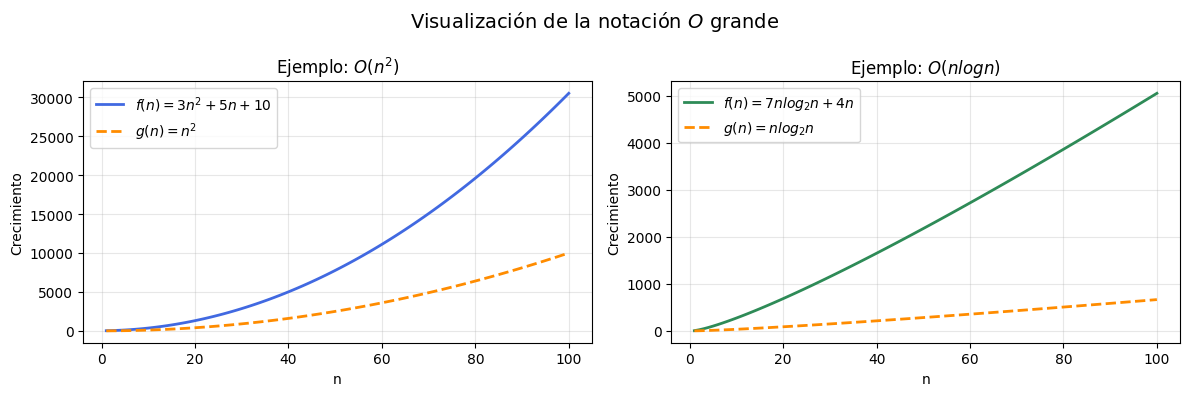

In [13]:
# Visualización de la notación O grande con ejemplos

import numpy as np
import matplotlib.pyplot as plt

# Rango de n
n = np.linspace(1, 100, 100)

# Ejemplos de funciones
f1 = 3*n**2 + 5*n + 10      # ejemplo ~ n^2
g1 = n**2                   # función dominante

f2 = 7*n*np.log2(n) + 4*n   # ejemplo ~ n log n
g2 = n*np.log2(n)

# Crear figura
fig, axs = plt.subplots(1, 2, figsize=(12, 4))

# Primer ejemplo: O(n^2)
axs[0].plot(n, f1, label=r"$f(n) = 3n^2 + 5n + 10$", color="royalblue", linewidth=2)
axs[0].plot(n, g1, label=r"$g(n) = n^2$", color="darkorange", linestyle="--", linewidth=2)
axs[0].set_title("Ejemplo: $O(n^2)$")
axs[0].set_xlabel("n")
axs[0].set_ylabel("Crecimiento")
axs[0].legend()
axs[0].grid(True, alpha=0.3)

# Segundo ejemplo: O(n log n)
axs[1].plot(n, f2, label=r"$f(n) = 7nlog_2 n + 4n$", color="seagreen", linewidth=2)
axs[1].plot(n, g2, label=r"$g(n) = nlog_2 n$", color="darkorange", linestyle="--", linewidth=2)
axs[1].set_title("Ejemplo: $O(n log n)$")
axs[1].set_xlabel("n")
axs[1].set_ylabel("Crecimiento")
axs[1].legend()
axs[1].grid(True, alpha=0.3)

plt.suptitle("Visualización de la notación $O$ grande", fontsize=14)
plt.tight_layout()
plt.show()


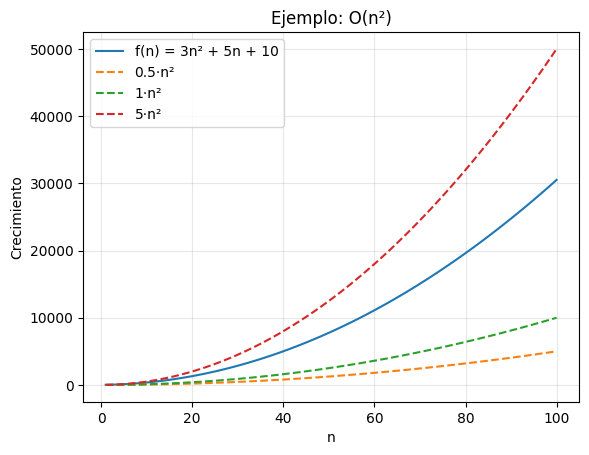

In [15]:
plt.plot(n, f1, label="f(n) = 3n² + 5n + 10")
plt.plot(n, 0.5*g1, '--', label="0.5·n²")
plt.plot(n, 1*g1, '--', label="1·n²")
plt.plot(n, 5*g1, '--', label="5·n²")
plt.title("Ejemplo: O(n²)")
plt.xlabel("n")
plt.ylabel("Crecimiento")
plt.legend()
plt.grid(True, alpha=0.3)


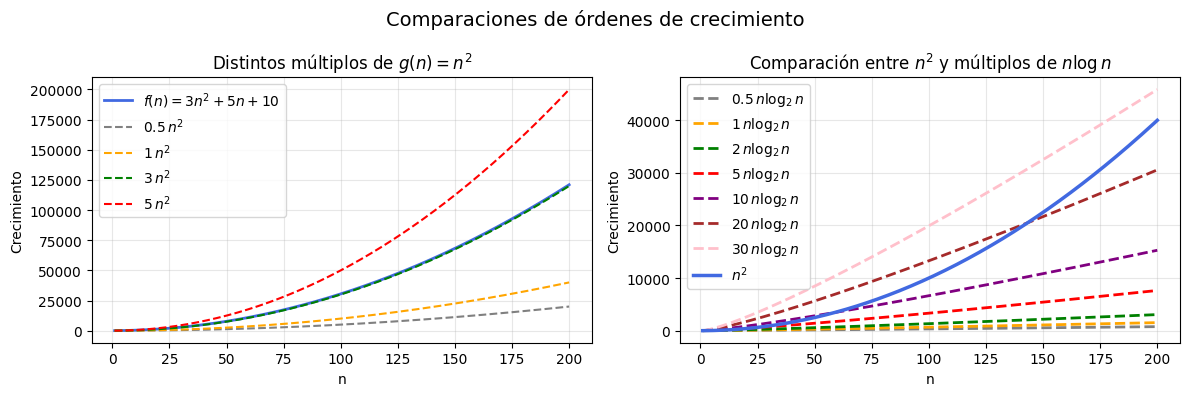

In [23]:
# Visualización de la notación O grande
# Incluye:
# 1. Constantes multiplicativas para mostrar que O(g(n)) ignora el factor constante.
# 2. Comparación entre n^2 y múltiples de n log n para ver que n^2 siempre termina dominando.

import numpy as np
import matplotlib.pyplot as plt

n = np.linspace(1, 200, 400)
f1 = 3*n**2 + 5*n + 10
g1 = n**2

# Graficas con multiples constantes c*g(n)
fig, axs = plt.subplots(1, 2, figsize=(12, 4))

# --- (1) Múltiplos de g(n) ---
axs[0].plot(n, f1, color="royalblue", linewidth=2, label=r"$f(n)=3n^2+5n+10$")
for c, col in zip([0.5, 1, 3, 5], ["gray", "orange", "green", "red"]):
    axs[0].plot(n, c*g1, linestyle="--", color=col, label=rf"${c}\,n^2$")
axs[0].set_title("Distintos múltiplos de $g(n)=n^2$")
axs[0].set_xlabel("n")
axs[0].set_ylabel("Crecimiento")
axs[0].legend()
axs[0].grid(alpha=0.3)

# --- (2) Comparación n log n vs n^2 con múltiples constantes ---
f2 = n**2
constantes = [0.5, 1, 2, 5, 10,20,30]
colores = ["gray", "orange", "green", "red", "purple", "brown", "pink"]

for c, col in zip(constantes, colores):
    axs[1].plot(n, c * n * np.log2(n), linestyle="--", color=col, linewidth=2,
                label=rf"${c}\,n\log_2 n$")
axs[1].plot(n, f2, color="royalblue", linewidth=2.5, label=r"$n^2$")
axs[1].set_title("Comparación entre $n^2$ y múltiplos de $n\\log n$")
axs[1].set_xlabel("n")
axs[1].set_ylabel("Crecimiento")
axs[1].legend()
axs[1].grid(alpha=0.3)

plt.suptitle("Comparaciones de órdenes de crecimiento", fontsize=14)
plt.tight_layout()
plt.show()


## Complejidad de Bubble Sort

**Suposiciones:** Bubble Sort recorre el arreglo en pasadas; en cada pasada compara pares adyacentes y, si están en orden incorrecto, los intercambia. Tras la pasada $i$ (contando desde 1), los últimos $i$ elementos quedan en su posición final.

### Comparaciones
- **Sin parada temprana (bandera `swapped`):** el número de comparaciones es fijo:
  $$
  \sum_{i=1}^{n-1} (n - i) = \frac{n(n-1)}{2} = O(n^2).
  $$
  Incluso si el arreglo ya está ordenado, se hacen todas esas comparaciones.
- **Con parada temprana:** en la **mejor situación** (arreglo ya ordenado) basta **una** pasada y se realizan
  $$
  n-1 = O(n)
  $$
  comparaciones. En promedio, el número de comparaciones sigue siendo $O(n^2)$, pero se reduce si el arreglo está casi ordenado.

### Intercambios (swaps) e inversiones
- Un intercambio elimina **exactamente una inversión** (un par fuera de orden).  
- **Peor caso (orden inverso):** el arreglo tiene $\frac{n(n-1)}{2}$ inversiones, por lo que hay
  $$
  \text{swaps} = \frac{n(n-1)}{2} = O(n^2).
  $$
- **Promedio (arreglo aleatorio):** el número esperado de inversiones es $\frac{n(n-1)}{4}$, por lo tanto también $O(n^2)$.
- **Mejor caso (ya ordenado):** **0** intercambios.

> Cada swap implica alrededor de 3 asignaciones (o un intercambio temporal), por lo que el costo total de swaps también crece como $O(n^2)$ en el peor caso.

### Tiempo total
- **Peor caso:** $T(n) = O(n^2)$.
- **Mejor caso (con parada temprana):** $T(n) = O(n)$ (una sola pasada, sin swaps).



## Ejercicio 1

Implementa el algortimo en una función `bubble_sort`

In [ ]:
# Implementacion concisa de Bubble Sort (in situ), para referencia
def bubble_sort(a, early_stop: bool = True):
    # Completa el arreglo 'a' usando Bubble Sort

# Prueba rapida
arr = [5, 1, 4, 2, 8]
bubble_sort(arr)
arr

## Algoritmo Insertion Sort (Inserción)

## Idea general

Comenzamos suponiendo que el primer elemento del arreglo ya está ordenado.  
Luego tomamos el siguiente elemento (la *key*), lo comparamos con los elementos anteriores y lo insertamos en la posición correcta desplazando hacia la derecha a los que sean mayores.  
Así, en cada iteración, el subarreglo a la izquierda de la *key* queda ordenado.


In [4]:
from typing import List, Dict, Any

def insertion_trace_simple(a: List[int]) -> List[Dict[str, Any]]:
    arr = list(a)
    n = len(arr)
    frames: List[Dict[str, Any]] = []
    
    def push(action, i, j, hole, key, display):
        frames.append({
            "arr": display.copy(),
            "i": i,
            "j": j,
            "hole": hole,
            "key": key,
            "action": action,
            "n": n
        })
    
    push("initial", i=0, j=None, hole=None, key=None, display=arr)
    
    if n <= 1:
        push("end", i=0, j=None, hole=None, key=None, display=arr)
        return frames
    
    arr_temp = list(arr)
    
    for i in range(1, n):
        key = arr_temp[i]
        j = i - 1
        push("start_i", i=i, j=j, hole=None, key=None, display=arr_temp)
        arr_temp[i] = None
        hole = i
        push("lift_key", i=i, j=j, hole=hole, key=key, display=arr_temp)
        while j >= 0 and arr_temp[j] is not None and arr_temp[j] > key:
            push("compare", i=i, j=j, hole=hole, key=key, display=arr_temp)
            arr_temp[j+1] = arr_temp[j]
            arr_temp[j] = None
            hole = j
            push("shift", i=i, j=j, hole=hole, key=key, display=arr_temp)
            j -= 1
        if j >= 0:
            push("compare", i=i, j=j, hole=hole, key=key, display=arr_temp)
        arr_temp[hole] = key
        push("insert", i=i, j=j, hole=None, key=None, display=arr_temp)
        push("sorted_update", i=i, j=None, hole=None, key=None, display=arr_temp)
    
    push("end", i=n-1, j=None, hole=None, key=None, display=arr_temp)
    return frames


## Instrucciones de uso

1. Edita el campo **"Arreglo"** con enteros separados por coma, por ejemplo: `20, 2, 12, 6, 25`.
2. Da clic en **"Construir trazas"** para generar la secuencia de pasos del algoritmo.
3. Usa los botones **"Anterior"** y **"Siguiente"** o el slider **"Paso"** para recorrer la evolución.
4. Colores:
   - **lightgreen**: parte izquierda ya ordenada.
   - **white (punteado)**: posición vacía (hueco) donde se insertará la *key*.
   - **orange**: elemento actual que se compara con la *key*.
   - **lightgray**: elementos aún no ordenados.
5. La flecha **azul** indica el elemento en foco (comparación o inserción).
6. El número mostrado sobre el hueco representa la *key* (el elemento que se está insertando).


In [5]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from ipywidgets import VBox, HBox, IntSlider, Button, Layout, Text, Output

def draw_array_frame(frame, total_steps, step_idx):
    arr = frame["arr"]
    i = frame["i"]
    j = frame["j"]
    hole = frame["hole"]
    key = frame["key"]
    action = frame["action"]
    n = frame["n"]
    
    if action in ("insert", "sorted_update"):
        sorted_end = i
    else:
        sorted_end = i - 1
    
    base_y = 0.0
    box_w, box_h = 0.9, 0.9
    
    fig, ax = plt.subplots(figsize=(9, 2.8))
    ax.set_xlim(-0.5, n - 0.5)
    ax.set_ylim(-0.8, 1.5)
    ax.axis("off")
    
    arrow_x = None
    if action in ("compare", "shift") and j is not None and 0 <= j < n:
        arrow_x = j
    elif action in ("start_i", "lift_key") and 0 <= i < n:
        arrow_x = i
    if arrow_x is not None:
        ax.annotate("", xy=(arrow_x, -0.1), xytext=(arrow_x, -0.6),
                    arrowprops=dict(arrowstyle="simple", color="blue"))
    
    for idx, val in enumerate(arr):
        x0 = idx - box_w/2
        face = "lightgray"
        if idx <= sorted_end and sorted_end >= 0:
            face = "lightgreen"
        if action in ("compare", "shift") and j is not None and idx == j:
            face = "orange"
        if hole is not None and idx == hole:
            face = "white"
        rect = patches.Rectangle((x0, base_y), box_w, box_h,
                                 facecolor=face,
                                 edgecolor="white" if hole is None or idx != hole else "black",
                                 linewidth=1.5,
                                 linestyle="--" if (hole is not None and idx == hole) else "solid")
        ax.add_patch(rect)
        if val is not None:
            ax.text(idx, base_y + box_h/2, str(val), ha="center", va="center", fontsize=12, color="white" if face!="white" else "black")
    
    if key is not None and hole is not None:
        ax.text(hole, base_y + box_h + 0.25, str(key), ha="center", va="bottom", fontsize=13)
    
    #ax.text(0, 1.2, f"{action} | i={i} | step {step_idx+1}/{total_steps}", ha="left", va="bottom", fontsize=10)
    plt.show()

array_text = Text(
    value="20, 2, 12, 6, 25",
    placeholder="Ej: 20, 2, 12, 6, 25",
    description="Arreglo:",
    layout=Layout(width="420px")
)
randomize_btn = Button(description="Arreglo aleatorio")
rebuild_btn   = Button(description="Construir trazas", button_style="success")
next_btn      = Button(description="Siguiente")
prev_btn      = Button(description="Anterior")
current_step  = IntSlider(value=0, min=0, max=0, step=1, description="Paso:", layout=Layout(width="400px"))
out = Output()

_frames = []

def parse_array(txt):
    items = [int(x.strip()) for x in txt.split(",") if x.strip() != ""]
    if len(items) == 0:
        raise ValueError("El arreglo no puede ser vacio")
    return items

def on_randomize(_):
    rng = np.random.default_rng()
    arr = list(rng.integers(1, 26, size=5))
    array_text.value = ", ".join(str(v) for v in arr)

def rebuild_frames(_=None):
    global _frames
    try:
        arr = parse_array(array_text.value)
    except Exception as e:
        with out:
            out.clear_output()
            print("Error:", e)
        return
    _frames = insertion_trace_simple(arr)
    current_step.max = max(0, len(_frames) - 1)
    current_step.value = 0
    redraw()

def redraw(*_):
    if not _frames:
        with out:
            out.clear_output()
            print("Sin trazas. Da clic en 'Construir trazas'.")
        return
    step = current_step.value
    frame = _frames[step]
    with out:
        out.clear_output()
        draw_array_frame(frame, total_steps=len(_frames), step_idx=step)

def on_next(_):
    if current_step.value < current_step.max:
        current_step.value += 1

def on_prev(_):
    if current_step.value > current_step.min:
        current_step.value -= 1

randomize_btn.on_click(on_randomize)
rebuild_btn.on_click(rebuild_frames)
next_btn.on_click(on_next)
prev_btn.on_click(on_prev)
current_step.observe(redraw, names="value")

ui = VBox([
    HBox([array_text, randomize_btn, rebuild_btn]),
    HBox([prev_btn, next_btn, current_step]),
    out
])

rebuild_frames()
ui


## Complejidad de Insertion Sort

**Suposiciones:** Insertion Sort construye un subarreglo ordenado de izquierda a derecha.  
En cada iteración toma un elemento (la *key*), desplaza hacia la derecha los elementos mayores a ella, y luego inserta la *key* en su posición correcta dentro del subarreglo ordenado.

### Comparaciones
- **Peor caso (arreglo en orden inverso):**  
  Cada nueva *key* se compara con todos los elementos previos.  
  El número total de comparaciones es
  $$
  \sum_{i=1}^{n-1} i = \frac{n(n-1)}{2} = O(n^2).
  $$
- **Mejor caso (arreglo ya ordenado):**  
  Cada *key* se compara solo una vez (la condición falla en la primera comparación), de modo que hay
  $$
  n - 1 = O(n)
  $$
  comparaciones.

### Desplazamientos (movimientos)
- **Peor caso (orden inverso):**  
  Cada inserción requiere desplazar todos los elementos anteriores, dando
  $$
  \text{movimientos} = \frac{n(n-1)}{2} = O(n^2).
  $$
- **Mejor caso (ordenado):**  
  No hay desplazamientos, $O(1)$ por iteración y $O(n)$ en total.

> Cada desplazamiento implica una asignación, y cada iteración incluye la comparación y la inserción final de la *key*.

### Tiempo total
- **Peor caso:** $T(n) = O(n^2)$.
- **Mejor caso (arreglo ordenado):** $T(n) = O(n)$.



## Ejercicio 2
Implementa el algortimo en una función `insertion_sort`

In [ ]:
# Implementacion concisa de Insertion Sort (in situ), para referencia
def insertion_sort(a):
    # Completa el arreglo 'a' usando Insertion Sort

    
# Prueba rapida
arr = [20, 2, 12, 6, 25]
insertion_sort(arr)
arr


[2, 6, 12, 20, 25]